In [134]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC as svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas  as pd
from sklearn import datasets
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [135]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[: , 0:4])
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


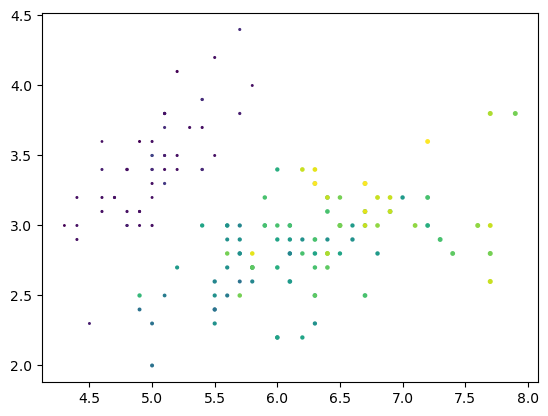

In [136]:
plt.scatter(X[0] , X[1] ,X[2] , X[3])

In [137]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [138]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [139]:
result = km.fit_predict(X)
X["cluster"] = result
X.head()

,0,1,2,3,cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


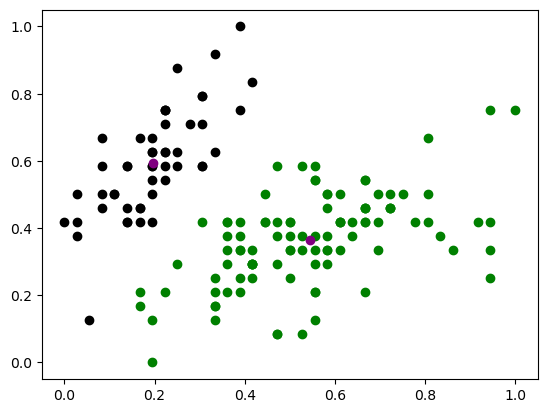

In [140]:
df1 = X[X["cluster"] == 0]
df2 = X[X["cluster"] == 1]

plt.scatter(df1[0] , df1[1] , color="green")
plt.scatter(df2[0] , df2[1] , color="black")
plt.scatter(km.cluster_centers_[: , 0] , km.cluster_centers_[: , 1]  , color="purple")

In [141]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    result = km.fit_predict(X)
    sse.append(km.inertia_)
sse

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


[74.49944375470662,
 12.127790750538193,
 6.982216473785235,
 5.51693347204037,
 4.582646051600781,
 3.955813309214785,
 3.526103729480867,
 3.160045590111739,
 2.834477767794467]

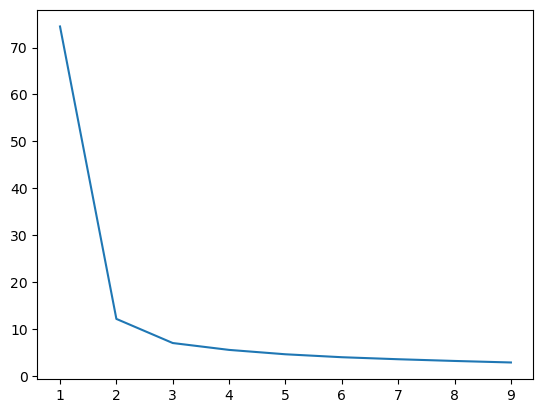

In [143]:
plt.plot(k_rng , sse)